# Crime Impacted Businesses in Calgary - Coursera Capstone Project

### We will start by Importing all the essential libraries

In [1]:
#install libraries

import pandas as pd
import numpy as np

#Install Nominatim to find geocoordinates of any given location
from geopy.geocoders import Nominatim

#Install folium to render maps
!pip install folium
import folium

#Install requests to interact with Foursquare API JSON file request
import requests
from pandas.io.json import json_normalize

     |████████████████████████████████| 93 kB 4.3 MB/s  eta 0:00:01


### We shall now import and insert data scraped from City of Calgary's open data source website and name it CalgaryCommercialCrimes

In [2]:
# The code was removed by Watson Studio for sharing.

,Community Name,Sum of Commercial Crime Count,Latitude,Longitude
0,ACADIA,1110,50.972331,-114.058873
1,ALBERT PARK/RADISSON HEIGHTS,968,51.043600,-113.996700
2,BANKVIEW,969,51.034200,-114.101100
3,BELTLINE,6287,51.041385,-114.087821
4,BOWNESS,1346,51.089977,-114.196769
5,BRIDGELAND/RIVERSIDE,1129,51.051736,-114.037375
6,CRESCENT HEIGHTS,1151,51.063329,-114.062315
7,DOVER,1090,51.023157,-113.980960
8,DOWNTOWN COMMERCIAL CORE,4229,51.046948,-114.070809
9,FALCONRIDGE,1072,51.100069,-113.946034


In [3]:
CalgaryCommercialCrimes=CalgaryCommercialCrimes.drop([19])

In [4]:
#To find out the number of communities in the dataframe, we will use the shape function

CalgaryCommercialCrimes.shape

(29, 4)

In [5]:
CalgaryCommercialCrimes

,Community Name,Sum of Commercial Crime Count,Latitude,Longitude
0,ACADIA,1110,50.972331,-114.058873
1,ALBERT PARK/RADISSON HEIGHTS,968,51.043600,-113.996700
2,BANKVIEW,969,51.034200,-114.101100
3,BELTLINE,6287,51.041385,-114.087821
4,BOWNESS,1346,51.089977,-114.196769
5,BRIDGELAND/RIVERSIDE,1129,51.051736,-114.037375
6,CRESCENT HEIGHTS,1151,51.063329,-114.062315
7,DOVER,1090,51.023157,-113.980960
8,DOWNTOWN COMMERCIAL CORE,4229,51.046948,-114.070809
9,FALCONRIDGE,1072,51.100069,-113.946034


### To better understand our data by visualization, we will use Nominatim and Folium to create a map of communities in our dataframe

In [6]:
#use Nominatim to find Calgary's latitude and longitude

address = 'Calgary, AB'

geolocator = Nominatim(user_agent="yyc_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinates of Calgary are {}, {}.'.format(latitude, longitude))

The geograpical coordinates of Calgary are 51.0534234, -114.0625892.


In [7]:
# create a map of Calgary's Commercial crime data using above latitude and longitude values

map_Calgary = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(CalgaryCommercialCrimes['Latitude'], CalgaryCommercialCrimes['Longitude'], CalgaryCommercialCrimes['Community Name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_Calgary)  
    
map_Calgary

### We will now attempt to use Foursquare API to fetch venues closest to the first community in our dataframe

In [8]:
#start analysis of venues using first community from the list

#find name of first community
CalgaryCommercialCrimes.loc[0,'Community Name']

#find latitude and Longitude values of the neighborhood
community_latitude = CalgaryCommercialCrimes.loc[0,'Latitude']
community_longitude = CalgaryCommercialCrimes.loc[0,'Longitude']
community_name = CalgaryCommercialCrimes.loc[0,'Community Name']

print('Latitude and longitude values of {} are {}, {}.'.format(community_name, 
                                                               community_latitude, 
                                                               community_longitude))

Latitude and longitude values of ACADIA are 50.97233072, -114.0588733.


#### We will now create our URL using our Foursquare account credentials (Client ID, Client Secret, Version)

In [9]:
#To find venues using Foursqure API, link foursquare ID to create URL API requests

CLIENT_ID = 'BLGLGUDM1DVFDVPAYB3D0VMVS4LDSVHBRIZOGVFZRLOQFX40' # your Foursquare ID
CLIENT_SECRET = 'AUDWX5PAYWETPHRIKTN02XZ44WTJS22WYOK2TURWERBTHBSH' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: BLGLGUDM1DVFDVPAYB3D0VMVS4LDSVHBRIZOGVFZRLOQFX40
CLIENT_SECRET:AUDWX5PAYWETPHRIKTN02XZ44WTJS22WYOK2TURWERBTHBSH


#### Since Foursquare API can pottentially return 1000s of results, we shall limit the number of results returned by our request to 100 within a radius of 5kms

In [10]:
#define result parameters (radius, limit)

LIMIT=100
radius=5000

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    community_latitude, 
    community_longitude, 
    radius, 
    LIMIT)
url # display URL

'https://api.foursquare.com/v2/venues/explore?&client_id=BLGLGUDM1DVFDVPAYB3D0VMVS4LDSVHBRIZOGVFZRLOQFX40&client_secret=AUDWX5PAYWETPHRIKTN02XZ44WTJS22WYOK2TURWERBTHBSH&v=20180605&ll=50.97233072,-114.0588733&radius=5000&limit=100'

In [11]:
#fetch results from foursquare API

results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5fd6eb0494a8241c1418b5de'},
 'response': {'suggestedFilters': {'header': 'Tap to show:',
   'filters': [{'name': 'Open now', 'key': 'openNow'}]},
  'headerLocation': 'Calgary',
  'headerFullLocation': 'Calgary',
  'headerLocationGranularity': 'city',
  'totalResults': 207,
  'suggestedBounds': {'ne': {'lat': 51.01733076500005,
    'lng': -113.98754355979928},
   'sw': {'lat': 50.92733067499996, 'lng': -114.13020304020073}},
  'groups': [{'type': 'Recommended Places',
    'name': 'recommended',
    'items': [{'reasons': {'count': 0,
       'items': [{'summary': 'This spot is popular',
         'type': 'general',
         'reasonName': 'globalInteractionReason'}]},
      'venue': {'id': '4b2409edf964a520aa5f24e3',
       'name': "Calgary Farmers' Market",
       'location': {'address': '510 77 Ave. SE',
        'crossStreet': 'Blackfoot Tr.',
        'lat': 50.98480933996366,
        'lng': -114.05146793204173,
        'labeledLatLngs': [{'label': 'di

### Next, we borrow the get_Category_type function from our Foursquare lab to extract the "type" of venue returned by our request URL

In [12]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [13]:
#get nearby venues from Json file rendered by foursquare API

venues = results['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

/opt/conda/envs/Python-3.7-main/lib/python3.7/site-packages/ipykernel/__main__.py:5: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead


,name,categories,lat,lng
0,Calgary Farmers' Market,Farmers Market,50.984809,-114.051468
1,Acadia Aquatic & Fitness Centre,Gym / Fitness Center,50.973297,-114.059984
2,Willow Park Wines & Spirits,Wine Shop,50.955878,-114.069236
3,Italian Centre Shop Ltd.,Grocery Store,50.963007,-114.060244
4,Costa Vida,Mexican Restaurant,50.965722,-114.074256


In [14]:
#Determine the number of venues returned for our first community by Foursquare API

print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


### In order to extract results for all the communities listed in our dataframe, we shall use the getNearbyVenues function

In [15]:
#define function to get nearby venues and their details for all neighborhoods in Calgary

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

### We will use the getNearbyVenues function to create a dataframe Calgary_venues which lists all the venues near each community

In [16]:
#get nearby venues for communities listed in our dataframe

Calgary_venues = getNearbyVenues(names=CalgaryCommercialCrimes['Community Name'],
                                   latitudes=CalgaryCommercialCrimes['Latitude'],
                                   longitudes=CalgaryCommercialCrimes['Longitude']
                                  )

ACADIA
ALBERT PARK/RADISSON HEIGHTS
BANKVIEW
BELTLINE
BOWNESS
BRIDGELAND/RIVERSIDE
CRESCENT HEIGHTS
DOVER
DOWNTOWN COMMERCIAL CORE
FALCONRIDGE
FOOTHILLS
FOREST LAWN
HILLHURST
HUNTINGTON HILLS
MANCHESTER INDUSTRIAL
MARLBOROUGH
MARLBOROUGH PARK
MARTINDALE
MISSION
PINERIDGE
RENFREW
RUNDLE
SADDLE RIDGE
SUNALTA
SUNRIDGE
TARADALE
TEMPLE
VARSITY
WHITEHORN


In [17]:
print(Calgary_venues.shape)
Calgary_venues

(294, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,ACADIA,50.972331,-114.058873,Acadia Aquatic & Fitness Centre,50.973297,-114.059984,Gym / Fitness Center
1,ACADIA,50.972331,-114.058873,Acadia Recreational Center,50.972256,-114.065077,Recreation Center
2,ALBERT PARK/RADISSON HEIGHTS,51.043600,-113.996700,Sugar Tree Cleaning Company,51.044662,-113.997207,Home Service
3,ALBERT PARK/RADISSON HEIGHTS,51.043600,-113.996700,The Skate Shack,51.042174,-113.998613,Rock Club
4,ALBERT PARK/RADISSON HEIGHTS,51.043600,-113.996700,Franklin (C-Train),51.047297,-113.994370,Light Rail Station
...,...,...,...,...,...,...,...
289,VARSITY,51.093400,-114.154900,Peking Garden,51.092656,-114.153882,Chinese Restaurant
290,VARSITY,51.093400,-114.154900,Kicks Soccer,51.092468,-114.154348,Sporting Goods Shop
291,VARSITY,51.093400,-114.154900,The UPS Store,51.091806,-114.154223,Shipping Store
292,WHITEHORN,51.088900,-113.972100,Calgary Co-op,51.085787,-113.973403,Gas Station


In [18]:
#Count the number of results returned for each community to ensure there are no gaps in data

Calgary_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
ACADIA,2,2,2,2,2,2
ALBERT PARK/RADISSON HEIGHTS,4,4,4,4,4,4
BANKVIEW,5,5,5,5,5,5
BELTLINE,62,62,62,62,62,62
BOWNESS,4,4,4,4,4,4
BRIDGELAND/RIVERSIDE,12,12,12,12,12,12
CRESCENT HEIGHTS,24,24,24,24,24,24
DOVER,3,3,3,3,3,3
DOWNTOWN COMMERCIAL CORE,57,57,57,57,57,57


In [19]:
#find unqiue categories

print('There are {} uniques categories.'.format(len(Calgary_venues['Venue Category'].unique())))

There are 106 uniques categories.


### Perform one hot encoding to convert categorical data into integers

In [20]:
# one hot encoding
Calgary_onehot = pd.get_dummies(Calgary_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Calgary_onehot['Neighborhood'] = Calgary_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Calgary_onehot.columns[-1]] + list(Calgary_onehot.columns[:-1])
Calgary_onehot = Calgary_onehot[fixed_columns]

Calgary_onehot.head()

,Neighborhood,American Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Bakery,Bank,Bar,Brazilian Restaurant,Breakfast Spot,...,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,ACADIA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,ACADIA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,ALBERT PARK/RADISSON HEIGHTS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,ALBERT PARK/RADISSON HEIGHTS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,ALBERT PARK/RADISSON HEIGHTS,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
Calgary_onehot.shape

(294, 107)

In [22]:
#Groupby neighbourhoods and find mean

Calgary_grouped = Calgary_onehot.groupby('Neighborhood').mean().reset_index()
Calgary_grouped

,Neighborhood,American Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Bakery,Bank,Bar,Brazilian Restaurant,Breakfast Spot,...,Thrift / Vintage Store,Toy / Game Store,Trail,Train Station,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Yoga Studio
0,ACADIA,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,ALBERT PARK/RADISSON HEIGHTS,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,BANKVIEW,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,BELTLINE,0.000000,0.0,0.000000,0.000000,0.032258,0.000000,0.016129,0.000000,0.016129,...,0.000000,0.000000,0.000000,0.000000,0.048387,0.000000,0.000000,0.000000,0.000000,0.000000
4,BOWNESS,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,BRIDGELAND/RIVERSIDE,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.083333,0.000000,0.083333
6,CRESCENT HEIGHTS,0.000000,0.0,0.000000,0.041667,0.000000,0.041667,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.041667,0.000000,0.000000,0.000000,0.000000,0.000000
7,DOVER,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.333333,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
8,DOWNTOWN COMMERCIAL CORE,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.052632,0.017544,0.017544,...,0.000000,0.000000,0.000000,0.000000,0.017544,0.000000,0.000000,0.000000,0.000000,0.017544
9,FALCONRIDGE,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [23]:
Calgary_grouped.shape

(29, 107)

In [24]:
#print Top 5 venues in each neighborhood

num_top_venues = 5

for hood in Calgary_grouped['Neighborhood']:
    print("----"+hood+"----")
    temp = Calgary_grouped[Calgary_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

----ACADIA----
                  venue  freq
0     Recreation Center   0.5
1  Gym / Fitness Center   0.5
2   American Restaurant   0.0
3                  Park   0.0
4        Rental Service   0.0


----ALBERT PARK/RADISSON HEIGHTS----
                 venue  freq
0            Rock Club  0.25
1   Light Rail Station  0.25
2        Train Station  0.25
3         Home Service  0.25
4  American Restaurant  0.00


----BANKVIEW----
                     venue  freq
0              Pizza Place   0.4
1              Candy Store   0.2
2  Health & Beauty Service   0.2
3              Coffee Shop   0.2
4      American Restaurant   0.0


----BELTLINE----
                   venue  freq
0            Coffee Shop  0.10
1                    Pub  0.08
2     Mexican Restaurant  0.06
3            Pizza Place  0.06
4  Vietnamese Restaurant  0.05


----BOWNESS----
               venue  freq
0  Food & Drink Shop  0.25
1               Café  0.25
2            Stadium  0.25
3        Coffee Shop  0.25
4           Pharm

### We will now sort our venues in descending order based on frequency and show results in a dataframe

In [25]:
#function to sort the venues in descending order.

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [26]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Calgary_grouped['Neighborhood']

for ind in np.arange(Calgary_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Calgary_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ACADIA,Recreation Center,Gym / Fitness Center,Yoga Studio,Gift Shop,Falafel Restaurant,Fast Food Restaurant,Food & Drink Shop,Food Court,French Restaurant,Furniture / Home Store
1,ALBERT PARK/RADISSON HEIGHTS,Rock Club,Home Service,Train Station,Light Rail Station,Yoga Studio,German Restaurant,Event Space,Falafel Restaurant,Fast Food Restaurant,Food & Drink Shop
2,BANKVIEW,Pizza Place,Candy Store,Health & Beauty Service,Coffee Shop,Gluten-free Restaurant,Fast Food Restaurant,Food & Drink Shop,Food Court,French Restaurant,Furniture / Home Store
3,BELTLINE,Coffee Shop,Pub,Mexican Restaurant,Pizza Place,Grocery Store,Vietnamese Restaurant,Hotel,Fast Food Restaurant,Liquor Store,Bakery
4,BOWNESS,Stadium,Food & Drink Shop,Coffee Shop,Café,Gluten-free Restaurant,Falafel Restaurant,Fast Food Restaurant,Food Court,French Restaurant,Furniture / Home Store
5,BRIDGELAND/RIVERSIDE,Yoga Studio,Sushi Restaurant,Coffee Shop,Deli / Bodega,Grocery Store,Gym / Fitness Center,Moving Target,Noodle House,Pizza Place,Sandwich Place
6,CRESCENT HEIGHTS,Noodle House,Pizza Place,Restaurant,Coffee Shop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Middle Eastern Restaurant,Pharmacy,Chinese Restaurant
7,DOVER,Sandwich Place,Convenience Store,Thrift / Vintage Store,Yoga Studio,Gift Shop,Falafel Restaurant,Fast Food Restaurant,Food & Drink Shop,Food Court,French Restaurant
8,DOWNTOWN COMMERCIAL CORE,Restaurant,Coffee Shop,Hotel,Bar,Sandwich Place,Pub,Japanese Restaurant,Café,Light Rail Station,Yoga Studio
9,FALCONRIDGE,Fast Food Restaurant,Construction & Landscaping,Yoga Studio,Gluten-free Restaurant,Falafel Restaurant,Food & Drink Shop,Food Court,French Restaurant,Furniture / Home Store,Gas Station


### Next, we will start analysing our data using K-means clustering

In [27]:
# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [28]:
# set number of clusters
kclusters = 3

Calgary_grouped_clustering = Calgary_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(Calgary_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

### Create a dataframe that includes cluster labels for each community from our dataframe

In [29]:
#dataframe that includes the cluster as well as the top 10 venues for each neighborhood

# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Calgary_merged = CalgaryCommercialCrimes

# merge manhattan_grouped with manhattan_data to add latitude/longitude for each neighborhood
Calgary_merged = Calgary_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Community Name')

Calgary_merged # check the last columns!

,Community Name,Sum of Commercial Crime Count,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,ACADIA,1110,50.972331,-114.058873,0,Recreation Center,Gym / Fitness Center,Yoga Studio,Gift Shop,Falafel Restaurant,Fast Food Restaurant,Food & Drink Shop,Food Court,French Restaurant,Furniture / Home Store
1,ALBERT PARK/RADISSON HEIGHTS,968,51.043600,-113.996700,0,Rock Club,Home Service,Train Station,Light Rail Station,Yoga Studio,German Restaurant,Event Space,Falafel Restaurant,Fast Food Restaurant,Food & Drink Shop
2,BANKVIEW,969,51.034200,-114.101100,0,Pizza Place,Candy Store,Health & Beauty Service,Coffee Shop,Gluten-free Restaurant,Fast Food Restaurant,Food & Drink Shop,Food Court,French Restaurant,Furniture / Home Store
3,BELTLINE,6287,51.041385,-114.087821,0,Coffee Shop,Pub,Mexican Restaurant,Pizza Place,Grocery Store,Vietnamese Restaurant,Hotel,Fast Food Restaurant,Liquor Store,Bakery
4,BOWNESS,1346,51.089977,-114.196769,0,Stadium,Food & Drink Shop,Coffee Shop,Café,Gluten-free Restaurant,Falafel Restaurant,Fast Food Restaurant,Food Court,French Restaurant,Furniture / Home Store
5,BRIDGELAND/RIVERSIDE,1129,51.051736,-114.037375,0,Yoga Studio,Sushi Restaurant,Coffee Shop,Deli / Bodega,Grocery Store,Gym / Fitness Center,Moving Target,Noodle House,Pizza Place,Sandwich Place
6,CRESCENT HEIGHTS,1151,51.063329,-114.062315,0,Noodle House,Pizza Place,Restaurant,Coffee Shop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Middle Eastern Restaurant,Pharmacy,Chinese Restaurant
7,DOVER,1090,51.023157,-113.980960,0,Sandwich Place,Convenience Store,Thrift / Vintage Store,Yoga Studio,Gift Shop,Falafel Restaurant,Fast Food Restaurant,Food & Drink Shop,Food Court,French Restaurant
8,DOWNTOWN COMMERCIAL CORE,4229,51.046948,-114.070809,0,Restaurant,Coffee Shop,Hotel,Bar,Sandwich Place,Pub,Japanese Restaurant,Café,Light Rail Station,Yoga Studio
9,FALCONRIDGE,1072,51.100069,-113.946034,0,Fast Food Restaurant,Construction & Landscaping,Yoga Studio,Gluten-free Restaurant,Falafel Restaurant,Food & Drink Shop,Food Court,French Restaurant,Furniture / Home Store,Gas Station


### Now we shall use seaborn in an attempt to find pattern in our clusters

#### Import libraries to run seaborn and plot results from our cluster

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
#set font size of labels on matplotlib plots
plt.rc('font', size=8)

#set style of plots
sns.set_style('white')

#define a custom palette
#customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
#sns.set_palette(customPalette)
#sns.palplot(customPalette)

#### Modify the resulting dataframe to only include cluster labels and most common venues

In [32]:
Calgary_merged.drop(columns=['Community Name', 'Sum of Commercial Crime Count', 'Latitude', 'Longitude'])

,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,0,Recreation Center,Gym / Fitness Center,Yoga Studio,Gift Shop,Falafel Restaurant,Fast Food Restaurant,Food & Drink Shop,Food Court,French Restaurant,Furniture / Home Store
1,0,Rock Club,Home Service,Train Station,Light Rail Station,Yoga Studio,German Restaurant,Event Space,Falafel Restaurant,Fast Food Restaurant,Food & Drink Shop
2,0,Pizza Place,Candy Store,Health & Beauty Service,Coffee Shop,Gluten-free Restaurant,Fast Food Restaurant,Food & Drink Shop,Food Court,French Restaurant,Furniture / Home Store
3,0,Coffee Shop,Pub,Mexican Restaurant,Pizza Place,Grocery Store,Vietnamese Restaurant,Hotel,Fast Food Restaurant,Liquor Store,Bakery
4,0,Stadium,Food & Drink Shop,Coffee Shop,Café,Gluten-free Restaurant,Falafel Restaurant,Fast Food Restaurant,Food Court,French Restaurant,Furniture / Home Store
5,0,Yoga Studio,Sushi Restaurant,Coffee Shop,Deli / Bodega,Grocery Store,Gym / Fitness Center,Moving Target,Noodle House,Pizza Place,Sandwich Place
6,0,Noodle House,Pizza Place,Restaurant,Coffee Shop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Middle Eastern Restaurant,Pharmacy,Chinese Restaurant
7,0,Sandwich Place,Convenience Store,Thrift / Vintage Store,Yoga Studio,Gift Shop,Falafel Restaurant,Fast Food Restaurant,Food & Drink Shop,Food Court,French Restaurant
8,0,Restaurant,Coffee Shop,Hotel,Bar,Sandwich Place,Pub,Japanese Restaurant,Café,Light Rail Station,Yoga Studio
9,0,Fast Food Restaurant,Construction & Landscaping,Yoga Studio,Gluten-free Restaurant,Falafel Restaurant,Food & Drink Shop,Food Court,French Restaurant,Furniture / Home Store,Gas Station


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25]),
 <a list of 26 Text major ticklabel objects>)

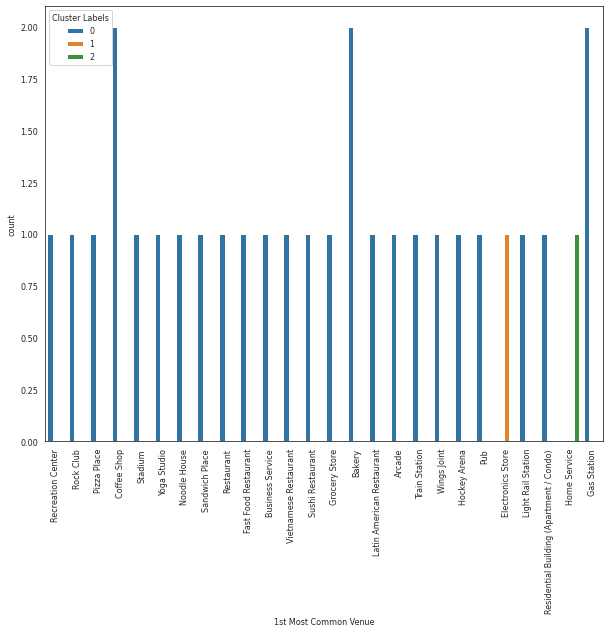

In [33]:
fig_dims = (10, 8)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.countplot(x="1st Most Common Venue", hue="Cluster Labels", data=Calgary_merged)
plt.xticks(rotation=90)

### Create a map to visualize clusters obtained from our K-means analysis

In [34]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(Calgary_merged['Latitude'], Calgary_merged['Longitude'], Calgary_merged['Community Name'], Calgary_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.9).add_to(map_clusters)
       
map_clusters

### List the venues from each cluster 

In [35]:
Calgary_merged.loc[Calgary_merged['Cluster Labels'] == 0, Calgary_merged.columns[[1] + list(range(5, Calgary_merged.shape[1]))]]

,Sum of Commercial Crime Count,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,1110,Recreation Center,Gym / Fitness Center,Yoga Studio,Gift Shop,Falafel Restaurant,Fast Food Restaurant,Food & Drink Shop,Food Court,French Restaurant,Furniture / Home Store
1,968,Rock Club,Home Service,Train Station,Light Rail Station,Yoga Studio,German Restaurant,Event Space,Falafel Restaurant,Fast Food Restaurant,Food & Drink Shop
2,969,Pizza Place,Candy Store,Health & Beauty Service,Coffee Shop,Gluten-free Restaurant,Fast Food Restaurant,Food & Drink Shop,Food Court,French Restaurant,Furniture / Home Store
3,6287,Coffee Shop,Pub,Mexican Restaurant,Pizza Place,Grocery Store,Vietnamese Restaurant,Hotel,Fast Food Restaurant,Liquor Store,Bakery
4,1346,Stadium,Food & Drink Shop,Coffee Shop,Café,Gluten-free Restaurant,Falafel Restaurant,Fast Food Restaurant,Food Court,French Restaurant,Furniture / Home Store
5,1129,Yoga Studio,Sushi Restaurant,Coffee Shop,Deli / Bodega,Grocery Store,Gym / Fitness Center,Moving Target,Noodle House,Pizza Place,Sandwich Place
6,1151,Noodle House,Pizza Place,Restaurant,Coffee Shop,Sandwich Place,Scenic Lookout,Seafood Restaurant,Middle Eastern Restaurant,Pharmacy,Chinese Restaurant
7,1090,Sandwich Place,Convenience Store,Thrift / Vintage Store,Yoga Studio,Gift Shop,Falafel Restaurant,Fast Food Restaurant,Food & Drink Shop,Food Court,French Restaurant
8,4229,Restaurant,Coffee Shop,Hotel,Bar,Sandwich Place,Pub,Japanese Restaurant,Café,Light Rail Station,Yoga Studio
9,1072,Fast Food Restaurant,Construction & Landscaping,Yoga Studio,Gluten-free Restaurant,Falafel Restaurant,Food & Drink Shop,Food Court,French Restaurant,Furniture / Home Store,Gas Station


In [36]:
Calgary_merged.loc[Calgary_merged['Cluster Labels'] == 1, Calgary_merged.columns[[1] + list(range(5, Calgary_merged.shape[1]))]]

,Sum of Commercial Crime Count,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
23,1077,Electronics Store,Yoga Studio,Falafel Restaurant,Fast Food Restaurant,Food & Drink Shop,Food Court,French Restaurant,Furniture / Home Store,Gas Station,Gay Bar


In [37]:
Calgary_merged.loc[Calgary_merged['Cluster Labels'] == 2, Calgary_merged.columns[[1] + list(range(5, Calgary_merged.shape[1]))]]

,Sum of Commercial Crime Count,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,946,Home Service,Yoga Studio,Gluten-free Restaurant,Falafel Restaurant,Fast Food Restaurant,Food & Drink Shop,Food Court,French Restaurant,Furniture / Home Store,Gas Station
